# 1. Perform Data pre-processing

In [ ]:
# Installing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [103]:
#https://drive.google.com/file/d/1DIi-agdZXvtiME4x9TkIWXkr1sz2dEQ6/view?usp=sharing

file_id = '1DIi-agdZXvtiME4x9TkIWXkr1sz2dEQ6'
link = f'https://drive.google.com/uc?id={file_id}'
data = pd.read_csv(link)
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [104]:
# Checking for null values
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

<ipython-input-105-eae4fc0e4099>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


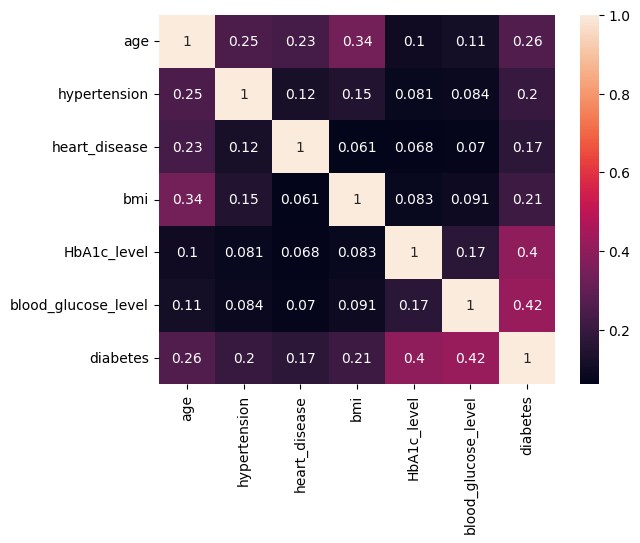

In [105]:
# Heatmap
sns.heatmap(data.corr(), annot = True)
plt.show()

In [106]:
correlation_matrix = data.corr()
correlation_matrix

<ipython-input-106-6617581d08be>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


In [107]:
# Dropping features
data2 = data.drop(["gender", "smoking_history"], axis = 1)
data2.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0


Separating the class 0 and class 1 data

In [108]:
zero_class = data[data.diabetes == 0]
zero_class.shape

(91500, 9)

In [109]:
one_class = data[data.diabetes == 1]
one_class.shape

(8500, 9)

Feature Scaling

In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit(data2.drop('diabetes',axis=1)).transform(data2.drop('diabetes',axis=1))
data2_scaled = pd.DataFrame(scaled, columns=data2.columns[:-1])
data2_scaled.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,1.692704,-0.284439,4.936379,-0.321056,1.001706,0.047704
1,0.538006,-0.284439,-0.202578,-0.000116,1.001706,-1.426210
2,-0.616691,-0.284439,-0.202578,-0.000116,0.161108,0.489878
3,-0.261399,-0.284439,-0.202578,-0.583232,-0.492690,0.416183
4,1.515058,3.515687,4.936379,-1.081970,-0.679490,0.416183


In [111]:
# Splitting the columns in to dependent (x) and independent (y) variables
x = data2_scaled
y = data['diabetes']

# 2. Use any best-fit Machine Learning Algorithm to build and train a model using the Diabetes dataset and predict whether the customer is diabetic or not.

In [112]:
# Split data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [113]:
# Apply SVM Model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svcmodel=SVC()
svcmodel.fit(x_train, y_train)
y_pred=svcmodel.predict(x_test)
print('Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy : 0.966


In [115]:
import pandas as pd

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results

,Actual,Predicted
3582,0,0
60498,0,0
53227,0,0
21333,0,0
3885,0,0
...,...,...
60116,0,0
2415,0,0
43763,0,0
71345,0,0


# 3. Deploy the model on the local Web server.

In [116]:
# Save the model
import pickle
pickle.dump(svcmodel, open('svcmodel.pkl','wb'))